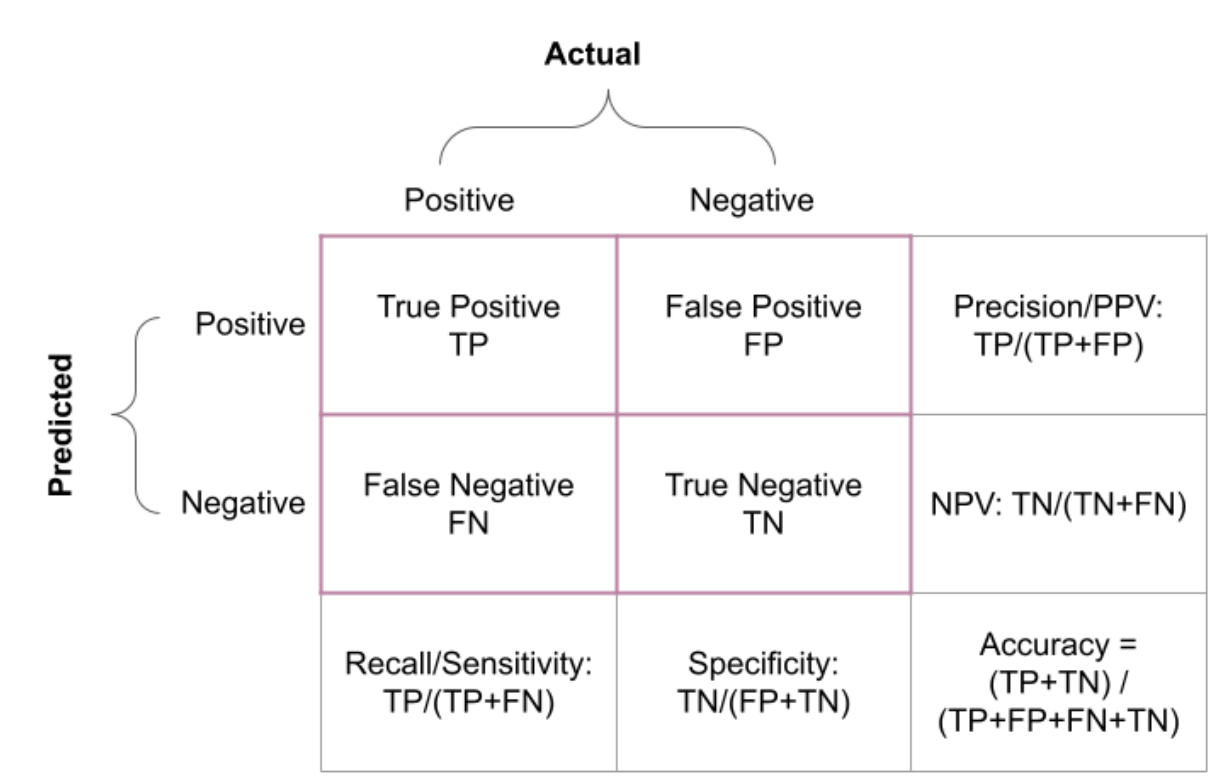

$$ \text{F-1 score} = \frac{\text{2 * Precision * Recall}}{\text{Precision + Recall}} $$

In [1]:
import pandas as pd

# 2. Given the following confusion matrix, evaluate (by hand) the model's performance

|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |

- which is the same as this: 

|               | IS dog     | NOT dog    |
|:------------  |-----------:|-----------:|
| pred dog      |         46 |         13 |
| pred not dog  |         7  |         34 |



In [2]:
recall = 46 / (7 + 46)
recall

0.8679245283018868

In [3]:
precision = 46 / (46 + 13)
precision

0.7796610169491526

In [4]:
accuracy = (46 + 34) / (46 + 34 + 13 + 7)
accuracy

0.8

In [5]:
f1_score = (2 * recall * precision) / (precision + recall)
f1_score

0.8214285714285715

### In the context of this problem, what is a false positive?

- predict cat, actually dog

### In the context of this problem, what is a false negative?

- predict dot, actually cat

### How would you describe this model?

- precision-oriented model

# 3. You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.

In [6]:
c3 = pd.read_csv('c3.csv')
c3.head()

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect


In [7]:
c3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   actual  200 non-null    object
 1   model1  200 non-null    object
 2   model2  200 non-null    object
 3   model3  200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [8]:
c3.describe()

,actual,model1,model2,model3
count,200,200,200,200
unique,2,2,2,2
top,No Defect,No Defect,No Defect,No Defect
freq,184,190,110,101


In [9]:
c3.actual.value_counts()

No Defect    184
Defect        16
Name: actual, dtype: int64

### An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. 

- Which evaluation metric would be appropriate here? 
    - We need to make sure to not allow any FN, b/c the team wants to id as many as possible.  
    ## Therefore, optimize for RECALL



|               | actual def | not defect |
|:------------  |-----------:|-----------:|
| predict def   |       'TP' |       'FP' |
| predict not   |       'FN' |       'TN' |

- Which model would be the best fit for this use case?
    ### Model 3 has the highest recall

In [10]:
c3.sample()

,actual,model1,model2,model3
19,No Defect,No Defect,Defect,Defect


In [11]:
model1 = c3.model1
model2 = c3.model2
model3 = c3.model3
c3['baseline_prediction'] = 'No Defect'

In [12]:
pd.crosstab(model1,c3.actual)

actual,Defect,No Defect
model1,,
Defect,8,2
No Defect,8,182


In [13]:
# Model and baseline accuracy:


model1_accuracy = (c3.actual == model1).mean()
model2_accuracy = (c3.actual == model2).mean()
model3_accuracy = (c3.actual == model3).mean()
baseline_accuracy = (c3.actual == c3.baseline_prediction).mean()

print(f'model1 accuracy: {model1_accuracy:.2%}')
print(f'model2 accuracy: {model2_accuracy:.2%}')
print(f'model3 accuracy: {model3_accuracy:.2%}')
print(f'baseline accuracy: {baseline_accuracy:.2%}')

model1 accuracy: 95.00%
model2 accuracy: 56.00%
model3 accuracy: 55.50%
baseline accuracy: 92.00%


In [14]:
subset = c3[c3.actual == 'Defect']

subset.sample()

,actual,model1,model2,model3,baseline_prediction
194,Defect,Defect,No Defect,Defect,No Defect


In [15]:
# calculate recall for model and baseline
model1_recall = (subset.actual == subset.model1).mean()
model2_recall = (subset.actual == subset.model2).mean()
model3_recall = (subset.actual == subset.model3).mean()

baseline_recall = (subset.actual == subset.baseline_prediction).mean()

print(f'model1 recall: {model1_recall:.2%}')
print(f'model2 recall: {model2_recall:.2%}')
print(f'model3 recall: {model3_recall:.2%}')
print(f'baseline recall: {baseline_recall:.2%}')

model1 recall: 50.00%
model2 recall: 56.25%
model3 recall: 81.25%
baseline recall: 0.00%


In [16]:
# Precision: # only look at the subset where we made positive prediction
# (i.e. prediction == 'coffee')

subset1 =c3[c3.model1 == 'Defect']
subset2 =c3[c3.model2 == 'Defect']
subset3 =c3[c3.model3 == 'Defect']
subset_baseline = c3[c3.baseline_prediction == 'Defect']

c3.head()

,actual,model1,model2,model3,baseline_prediction
0,No Defect,No Defect,Defect,No Defect,No Defect
1,No Defect,No Defect,Defect,Defect,No Defect
2,No Defect,No Defect,Defect,No Defect,No Defect
3,No Defect,Defect,Defect,Defect,No Defect
4,No Defect,No Defect,Defect,No Defect,No Defect


In [17]:
model1_precision = (subset1.actual == subset1.model1).mean()
model2_precision = (subset2.actual == subset2.model2).mean()
model3_precision = (subset3.actual == subset3.model3).mean()
baseline_precision = (subset_baseline.actual == subset_baseline.baseline_prediction).mean()

print(f'model1 precision: {model1_precision:.2%}')
print(f'model2 precision: {model2_precision:.2%}')
print(f'model3 precision: {model3_precision:.2%}')

print(f'baseline precision: {baseline_precision:.2%}')
# This is returning a NAN for baseline precisin bc there are no 'Defect' values in that column

model1 precision: 80.00%
model2 precision: 10.00%
model3 precision: 13.13%
baseline precision: nan%


### Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. 

- They need you to predict which ducks will have defects, but tell you they really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. 

- Which evaluation metric would be appropriate here?
    ### Optimize for PRECISION
- Which model would be the best fit for this use case?
    ### Model 1 has the highest precision (see calculations above)

# 4. You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).

- At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. 
- First an automated algorithm tags pictures as either a cat or a dog (Phase I). 
- Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

|               | IS dog     | NOT dog    |
|:------------  |-----------:|-----------:|
| pred dog      |         46 |         13 |
| pred not dog  |         7  |         34 |


## Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:

- In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?
    ### Model 1 achieves a higher accuracy
- Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? For Phase II?
    ### Highest recall for Phase I (which is Model 4)
    ### Highest precision for Phase II (which is Model 2)
    

- Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for Phase I? For Phase II?
    ### Not actually sure here
    ### Ditto


In [18]:
paws = pd.read_csv('gives_you_paws.csv')
paws

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog
...,...,...,...,...,...
4995,dog,dog,dog,dog,dog
4996,dog,dog,cat,cat,dog
4997,dog,cat,cat,dog,dog
4998,cat,cat,cat,cat,dog


In [19]:
paws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   actual  5000 non-null   object
 1   model1  5000 non-null   object
 2   model2  5000 non-null   object
 3   model3  5000 non-null   object
 4   model4  5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [20]:
paws.describe()

,actual,model1,model2,model3,model4
count,5000,5000,5000,5000,5000
unique,2,2,2,2,2
top,dog,dog,cat,dog,dog
freq,3254,2937,3212,2508,4253


In [21]:
paws.actual.value_counts()

dog    3254
cat    1746
Name: actual, dtype: int64

In [22]:
paws['baseline_prediction'] = 'dog'

In [23]:
paws

,actual,model1,model2,model3,model4,baseline_prediction
0,cat,cat,dog,cat,dog,dog
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
4,cat,cat,cat,dog,dog,dog
...,...,...,...,...,...,...
4995,dog,dog,dog,dog,dog,dog
4996,dog,dog,cat,cat,dog,dog
4997,dog,cat,cat,dog,dog,dog
4998,cat,cat,cat,cat,dog,dog


## Paws accuracy

In [24]:
model1_accuracy = (paws.actual == paws.model1).mean()
model2_accuracy = (paws.actual == paws.model2).mean()
model3_accuracy = (paws.actual == paws.model3).mean()
model4_accuracy = (paws.actual == paws.model4).mean()


baseline_accuracy = (paws.actual == paws.baseline_prediction).mean()

print(f'model1 accuracy: {model1_accuracy:.2%}')
print(f'model2 accuracy: {model2_accuracy:.2%}')
print(f'model3 accuracy: {model3_accuracy:.2%}')
print(f'model4 accuracy: {model4_accuracy:.2%}')


print(f'baseline accuracy: {baseline_accuracy:.2%}')

model1 accuracy: 80.74%
model2 accuracy: 63.04%
model3 accuracy: 50.96%
model4 accuracy: 74.26%
baseline accuracy: 65.08%


# Paws Recall

In [25]:
subset = paws[paws.actual == 'dog']

model1_recall = (subset.actual == subset.model1).mean()
model2_recall = (subset.actual == subset.model2).mean()
model3_recall = (subset.actual == subset.model3).mean()
model4_recall = (subset.actual == subset.model4).mean()


baseline_recall = (subset.actual == subset.baseline_prediction).mean()

print(f'model1 recall: {model1_recall:.2%}')
print(f'model2 recall: {model2_recall:.2%}')
print(f'model3 recall: {model3_recall:.2%}')
print(f'model4 recall: {model4_recall:.2%}')


print(f'baseline recall: {baseline_recall:.2%}')

model1 recall: 80.33%
model2 recall: 49.08%
model3 recall: 50.86%
model4 recall: 95.57%
baseline recall: 100.00%


# Paws Precision

In [26]:
subset1 =paws[paws.model1 == 'dog']
subset2 =paws[paws.model2 == 'dog']
subset3 =paws[paws.model3 == 'dog']
subset4 =paws[paws.model4 == 'dog']


subset_baseline = paws[paws.baseline_prediction == 'dog']

In [27]:
model1_precision = (subset1.actual == subset1.model1).mean()
model2_precision = (subset2.actual == subset2.model2).mean()
model3_precision = (subset3.actual == subset3.model3).mean()
model4_precision = (subset4.actual == subset4.model4).mean()


baseline_precision = (subset_baseline.actual == subset_baseline.baseline_prediction).mean()

print(f'model1 precision: {model1_precision:.2%}')
print(f'model2 precision: {model2_precision:.2%}')
print(f'model3 precision: {model3_precision:.2%}')
print(f'model4 precision: {model4_precision:.2%}')


print(f'baseline precision: {baseline_precision:.2%}')

model1 precision: 89.00%
model2 precision: 89.32%
model3 precision: 65.99%
model4 precision: 73.12%
baseline precision: 65.08%


# 5. Follow the links below to read the documentation about each function, then apply those functions to the data from the previous problem.

- sklearn.metrics.accuracy_score
- sklearn.metrics.precision_score
- sklearn.metrics.recall_score
- sklearn.metrics.classification_report 

In [28]:
accuracy_model1 = paws.model1
accuracy_model2 = paws.model2
accuracy_model3 = paws.model3
accuracy_model4 = paws.model4
baseline = paws.baseline_prediction
actual = paws.actual

In [29]:
from sklearn.metrics import accuracy_score
# y_pred = paws.model1
# y_true = paws.actual
# accuracy_score(y_true, y_pred)


In [30]:
model1_accuracy = accuracy_score(actual, accuracy_model1)
model2_accuracy = accuracy_score(actual, accuracy_model2)
model3_accuracy = accuracy_score(actual, accuracy_model3)
model4_accuracy = accuracy_score(actual, accuracy_model4)
baseline_accuracy = accuracy_score(actual, baseline)
print(f'model1 accuracy: {model1_accuracy:.2%}')
print(f'model2 accuracy: {model2_accuracy:.2%}')
print(f'model3 accuracy: {model3_accuracy:.2%}')
print(f'model4 accuracy: {model4_accuracy:.2%}')


print(f'baseline accuracy: {baseline_accuracy:.2%}')

model1 accuracy: 80.74%
model2 accuracy: 63.04%
model3 accuracy: 50.96%
model4 accuracy: 74.26%
baseline accuracy: 65.08%


In [38]:
from sklearn.metrics import precision_score
# >>> y_true = [0, 1, 2, 0, 1, 2]
# >>> y_pred = [0, 2, 1, 0, 0, 1]
# >>> precision_score(y_true, y_pred, average='macro')

In [101]:

print(f'model1 recall: {precision_score(actual, model1, average=None)}')
print(f'model2 recall: {precision_score(actual, model2, average=None)}')
print(f'model3 recall: {precision_score(actual, model3, average=None)}')
print(f'model4 recall: {precision_score(actual, model4, average=None)}')
print(f'baseline recall: {precision_score(actual, baseline, average=None)}')

model1 recall: [0.68977218 0.89002383]
model2 recall: [0.48412204 0.89317673]
model3 recall: [0.35834671 0.65988836]
model4 recall: [0.80722892 0.73124853]
baseline recall: [0.     0.6508]


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.metrics import recall_score

In [100]:
# print(recall_score(actual, model1, average=None, pos_label=['cat','dog']))


print(f'model1 recall: {recall_score(actual, model1, average=None)}')
print(f'model2 recall: {recall_score(actual, model2, average=None)}')
print(f'model3 recall: {recall_score(actual, model3, average=None)}')
print(f'model4 recall: {recall_score(actual, model4, average=None)}')
print(f'baseline recall: {recall_score(actual, baseline, average=None)}')

model1 recall: [0.81500573 0.80331899]
model2 recall: [0.8906071  0.49078058]
model3 recall: [0.51145475 0.50860479]
model4 recall: [0.34536082 0.95574677]
baseline recall: [0. 1.]


In [45]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(paws.actual, paws.model1))

              precision    recall  f1-score   support

         cat       0.69      0.82      0.75      1746
         dog       0.89      0.80      0.84      3254

    accuracy                           0.81      5000
   macro avg       0.79      0.81      0.80      5000
weighted avg       0.82      0.81      0.81      5000



In [64]:
model1 = paws.model1
model2 = paws.model2
model3 = paws.model3
model4 = paws.model4
baseline = paws.baseline_prediction
actual = paws.actual
models = [model1, model2, model3, model4, baseline]

In [72]:
for model in models:
    print(f'{model.name}', classification_report(actual, model))

model1               precision    recall  f1-score   support

         cat       0.69      0.82      0.75      1746
         dog       0.89      0.80      0.84      3254

    accuracy                           0.81      5000
   macro avg       0.79      0.81      0.80      5000
weighted avg       0.82      0.81      0.81      5000

model2               precision    recall  f1-score   support

         cat       0.48      0.89      0.63      1746
         dog       0.89      0.49      0.63      3254

    accuracy                           0.63      5000
   macro avg       0.69      0.69      0.63      5000
weighted avg       0.75      0.63      0.63      5000

model3               precision    recall  f1-score   support

         cat       0.36      0.51      0.42      1746
         dog       0.66      0.51      0.57      3254

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.50      5000
weighted avg       0.55      0.51      0.52      5000

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
